In [1]:
# Pandas is for using data structures
import pandas as pd
# statsmodels contain modules for regression and time series analysis
import statsmodels.formula.api as smf
# statsmodels contain modules for regression and time series analysis
import statsmodels.api as sm
# numpy is for numerical computing of array and matrix
import numpy as np
# Matplotlib is a plotting package
import matplotlib.pyplot as plt
# matplotlib Showing the plot right after the current code  
%matplotlib inline


In [2]:
# Impport data
df = pd.read_excel('data/pharmacy profit.xlsx')
df_city = df.drop(columns="Location")
df_p = df_city.drop(index= 110)
N = df_p.shape
print(N)

(110, 7)


In [4]:
# showing the top and bottom portion of data  
df_p.head()

,Profit,Income,Disposable Income,"Birth Rate (per 1,000)","Soc Security (per 1,000)","CV Death (per 100,000)",% 65 or Older
0,199780.0,28719,22701,13.1,177.7,429.9,14.6
1,165530.0,25835,19890,15.8,143.8,222.9,10.7
2,208670.0,22675,18051,11.6,179.8,561.5,17.6
3,166890.0,33501,27031,18.5,62.5,99.8,4.7
4,209190.0,27107,21182,13.6,152.6,319.4,12.0


In [5]:
df_p.tail()

,Profit,Income,Disposable Income,"Birth Rate (per 1,000)","Soc Security (per 1,000)","CV Death (per 100,000)",% 65 or Older
105,182710.0,19768,15783,21.3,143.7,319.4,11.0
106,211060.0,25170,19444,13.0,187.8,422.1,13.5
107,305020.0,29057,33519,13.3,255.2,528.4,24.3
108,201730.0,19780,17759,20.4,151.8,368.5,12.3
109,211620.0,25981,19155,12.8,212.3,477.9,16.2


In [6]:
# view summary statistics
df_p.describe() 

,Profit,Income,Disposable Income,"Birth Rate (per 1,000)","Soc Security (per 1,000)","CV Death (per 100,000)",% 65 or Older
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,184007.727273,25600.790909,19855.663636,14.919091,160.932727,343.725455,12.342727
std,26647.813572,3788.046816,3223.703379,3.001085,37.302503,89.508622,3.326553
min,132700.000000,18551.000000,11287.000000,9.300000,62.500000,99.800000,4.700000
25%,165595.000000,23243.000000,17950.000000,13.300000,139.450000,285.225000,10.225000
50%,182525.000000,24933.500000,19244.500000,14.550000,159.350000,343.050000,12.050000
75%,200657.500000,27784.000000,21813.250000,15.875000,178.450000,396.100000,13.875000
max,305020.000000,40089.000000,33519.000000,29.900000,304.500000,581.800000,24.800000


In [7]:
corr = df_p.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Profit,Income,Disposable Income,"Birth Rate (per 1,000)","Soc Security (per 1,000)","CV Death (per 100,000)",% 65 or Older
Profit,1,0.26,0.47,-0.35,0.67,0.61,0.77
Income,0.26,1,0.78,-0.091,-0.13,-0.05,-0.056
Disposable Income,0.47,0.78,1,-0.26,0.063,0.056,0.16
"Birth Rate (per 1,000)",-0.35,-0.091,-0.26,1,-0.58,-0.55,-0.55
"Soc Security (per 1,000)",0.67,-0.13,0.063,-0.58,1,0.85,0.94
"CV Death (per 100,000)",0.61,-0.05,0.056,-0.55,0.85,1,0.87
% 65 or Older,0.77,-0.056,0.16,-0.55,0.94,0.87,1


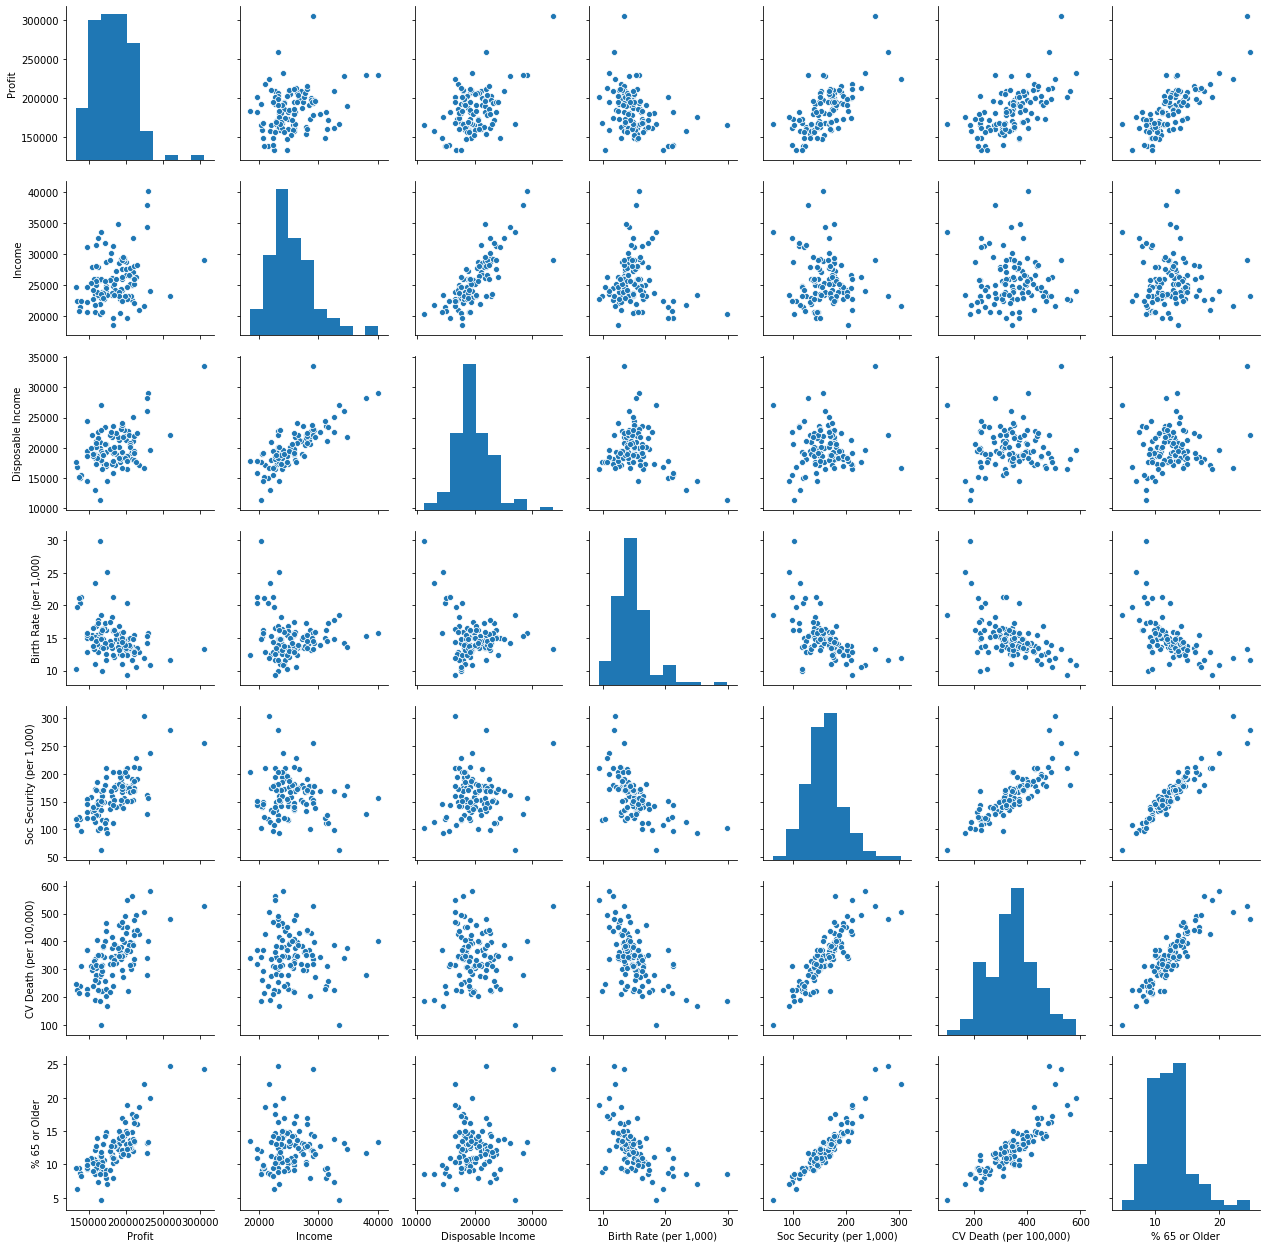

In [8]:
# scatter plot matrix
import seaborn as sns
sns_plot = sns.pairplot(df_p)
#sns_plot.savefig("sctmtx.pdf")


In [9]:
# Specify the dependent variable and independent variables
X = df_p.drop(columns="Profit")
Y = df_p['Profit']

In [10]:
display(X)

,Income,Disposable Income,"Birth Rate (per 1,000)","Soc Security (per 1,000)","CV Death (per 100,000)",% 65 or Older
0,28719,22701,13.1,177.7,429.9,14.6
1,25835,19890,15.8,143.8,222.9,10.7
2,22675,18051,11.6,179.8,561.5,17.6
3,33501,27031,18.5,62.5,99.8,4.7
4,27107,21182,13.6,152.6,319.4,12.0
...,...,...,...,...,...,...
105,19768,15783,21.3,143.7,319.4,11.0
106,25170,19444,13.0,187.8,422.1,13.5
107,29057,33519,13.3,255.2,528.4,24.3
108,19780,17759,20.4,151.8,368.5,12.3


In [11]:
display(Y)

0      199780.0
1      165530.0
2      208670.0
3      166890.0
4      209190.0
         ...   
105    182710.0
106    211060.0
107    305020.0
108    201730.0
109    211620.0
Name: Profit, Length: 110, dtype: float64

In [12]:
# Fit multiple regression model and show summary of fit 
model_fit1 = sm.OLS(Y,sm.add_constant(X)).fit()
print(model_fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     53.12
Date:                Thu, 13 Feb 2020   Prob (F-statistic):           2.41e-29
Time:                        14:09:32   Log-Likelihood:                -1199.0
No. Observations:                 110   AIC:                             2412.
Df Residuals:                     103   BIC:                             2431.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

/home/imwan/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [13]:
# drop insignificant x-variables
X = df_p.drop(columns=['Profit','Income','Soc Security (per 1,000)', 'CV Death (per 100,000)'])

In [14]:
display(X)

,Disposable Income,"Birth Rate (per 1,000)",% 65 or Older
0,22701,13.1,14.6
1,19890,15.8,10.7
2,18051,11.6,17.6
3,27031,18.5,4.7
4,21182,13.6,12.0
...,...,...,...
105,15783,21.3,11.0
106,19444,13.0,13.5
107,33519,13.3,24.3
108,17759,20.4,12.3


In [15]:
# Refit multiple regression model and show summary of fit 
model_fit = sm.OLS(Y,sm.add_constant(X)).fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     107.2
Date:                Thu, 13 Feb 2020   Prob (F-statistic):           5.73e-32
Time:                        14:09:32   Log-Likelihood:                -1199.8
No. Observations:                 110   AIC:                             2408.
Df Residuals:                     106   BIC:                             2418.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.00

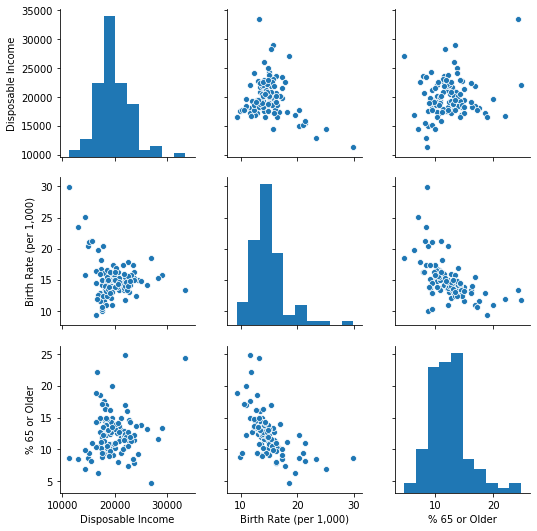

In [16]:
sns_plot_1 = sns.pairplot(df_p, vars = ["Disposable Income", "Birth Rate (per 1,000)", "% 65 or Older"])


Text(0.5, 1.0, 'Histogram')

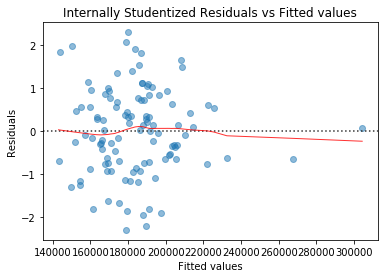

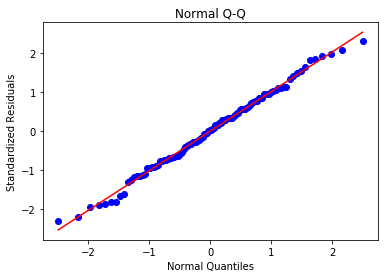

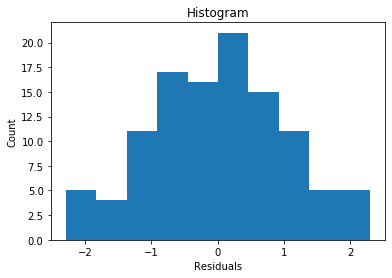

In [17]:
#Residual plots
# model values
fitted_y = model_fit.fittedvalues
# model residuals
residuals = model_fit.resid
# internally studentized residuals
studentized_residuals = model_fit.get_influence().resid_studentized_internal


plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(fitted_y, studentized_residuals, data=df_p,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Internally Studentized Residuals vs Fitted values')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

# QQ plot
import numpy as np
import scipy.stats as stats
plot_lm_2 = plt.figure()
plot_lm_2.axes[0]=stats.probplot(studentized_residuals, dist="norm", plot=plt)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Normal Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

#histogram
plt.figure()
plt.hist(studentized_residuals)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Histogram')

# residual order plot

#time plot
#plt.figure()
#obs_order = df_p.iloc[]
#dateRank = [int(i)-1 for i in dateRank]
#dateRank
#ordered_model_norm_residuals = model_norm_residuals[dateRank]
#plt.plot(ordered_model_norm_residuals)

#df_p.apply(lambda residuals: plt.scatter(residuals.index, residuals, c='g'))
#plt.xlabel('Observation order')
#plt.ylabel('Residuals')
#plt.title('Order plot of residuals')



In [18]:
#Prediction with Kansas City,MO-KS

Xnew = np.column_stack((1,22642,14.4,11.4))
Ynew = model_fit.predict(Xnew)

model_fit_get_prediction = model_fit.get_prediction(Xnew)
model_fit_get_prediction.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,185818.710508,1809.324546,182231.548617,189405.872398,158901.859001,212735.562014


In [19]:
# Identify the underperformed sites 
for i in range(0,df_p.shape[0]):
    if studentized_residuals[i] < -2:
        print (i+1, "% 12.2f" % studentized_residuals[i], df["Location"][i])

31        -2.29 Denver-Boulder-Greeley,CO
90        -2.21 Rockford,IL
